In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

2025-11-07 00:17:16.169990: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-07 00:17:16.170207: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-07 00:17:16.202335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-07 00:17:17.194377: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
path = 'data/creditcardfraud-csv/creditcard.csv'
df = pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df = df.drop(['Time','Class'], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [4]:
# Preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

In [5]:
print(x_train.shape[1])
print(x_test.shape[1])
type(x_train)

29
29


pandas.core.frame.DataFrame

In [6]:
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

In [7]:
encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='relu')
])
        
decoder = tf.keras.models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Use linear activation for reconstruction
])
        
model = tf.keras.models.Sequential([
    encoder,
    decoder
])

E0000 00:00:1762454840.616071  126384 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1762454840.622677  126384 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.compile(optimizer='adam', loss ='mean_squared_error')

In [9]:
history = model.fit(
    x_train, 
    x_train, 
    validation_data=(x_test,x_test),
    epochs=5,
    batch_size = 100,
    shuffle=True
)

Epoch 1/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 81.6968 - val_loss: 1.0393
Epoch 2/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.3822 - val_loss: 0.5244
Epoch 3/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.3406 - val_loss: 0.4137
Epoch 4/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.3738 - val_loss: 0.4028
Epoch 5/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.5244 - val_loss: 0.5310


<Axes: >

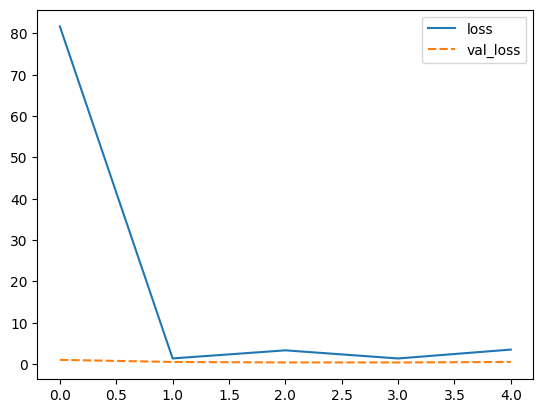

In [10]:
import seaborn as sns
sns.lineplot(model.history.history)

In [11]:
predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step


In [12]:
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
threshold

np.float64(1.4906877163125307)

In [13]:
anomalies = mse > threshold

In [14]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 2849


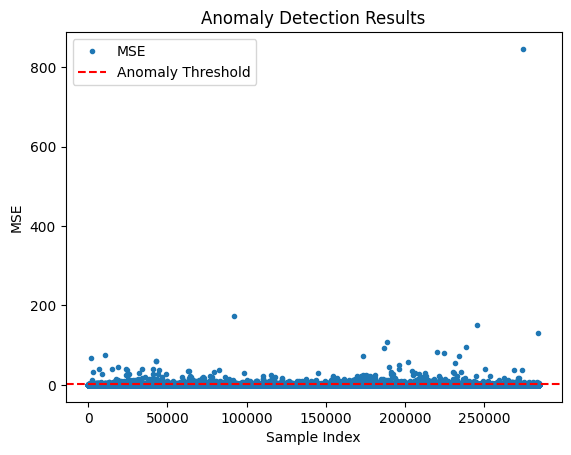

In [15]:
#Plot the anomalies
import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

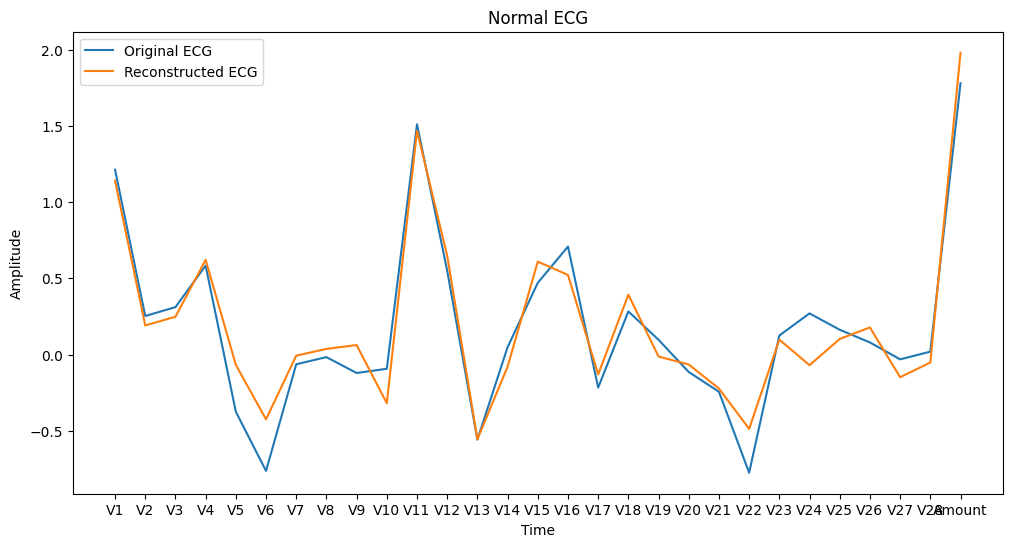

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(x_test.iloc[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

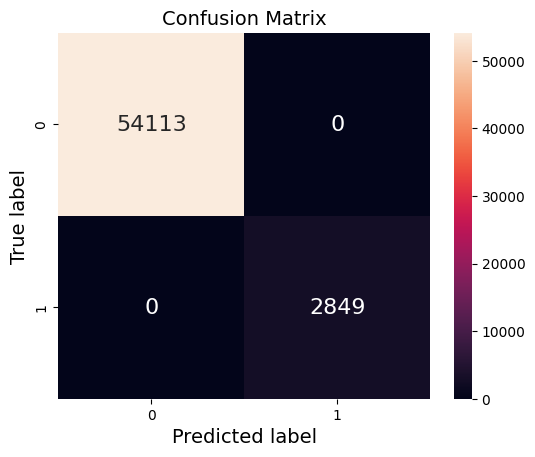

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')

plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()